# Problem Statement:
Find the attributes causing high sale in a cloth manufacturing company. 

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder

# Import Datast

In [2]:
company_data = pd.read_csv('Company_Data.csv')

In [3]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Data Understanding

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

###### No null values are present.

## Data Preparation

In [5]:
np.mean(company_data['Sales'])

7.496325

In [6]:
company_data.insert(loc = 0,column = 'sales',value = 0)

In [7]:
company_data

,sales,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,0,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,0,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
company_data.loc[company_data["Sales"]>7.49,"sales"]=1
company_data.drop(["Sales"],axis=1,inplace=True)

In [9]:
company_data

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


###### or Another way of achivinf this is
comp_data["sales"]="small"
comp_data.loc[comp_data["Sales"]>7.49,"sales"]="large"
comp_data.drop(["Sales"],axis=1,inplace=True)

In [10]:
company_data['ShelveLoc'] = LabelEncoder().fit_transform(company_data['ShelveLoc']) #0 : Bad, 1: Good, 2: Medium
company_data['Urban']     = LabelEncoder().fit_transform(company_data['Urban'])     #1 : yes, 0: No
company_data['US']        = LabelEncoder().fit_transform(company_data['US'])        #1 : yes, 0: No
company_data['sales']     = LabelEncoder().fit_transform(company_data['sales'])      
company_data.head()

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


# Model Building

In [11]:
X = company_data.drop(labels=['sales'],axis=1)   #,'Urban','US','ShelveLoc'
y = company_data[['sales']]
X.shape,y.shape

((400, 10), (400, 1))

In [12]:
dt_model = DecisionTreeClassifier()

# Model Training

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [14]:
X_train.shape

(320, 10)

In [15]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

# Plotting the tree

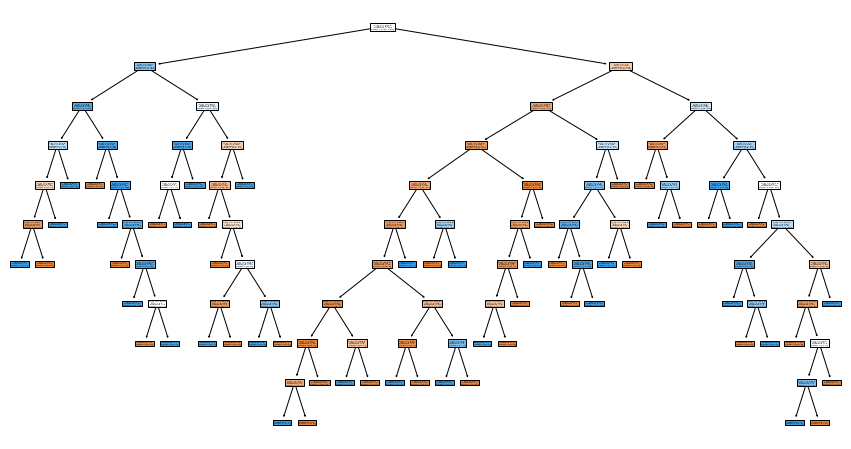

In [16]:
plt.figure(figsize=(15,8))
plot_tree(dt_model,filled=True)
plt.show()

# Model Testing || Model Evaluation

### Training Data

In [16]:
y_pred_train = dt_model.predict(X_train)

In [17]:
print(accuracy_score(y_train,y_pred_train))

1.0


In [18]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       159

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [19]:
confusion_matrix(y_train,y_pred_train)

array([[161,   0],
       [  0, 159]], dtype=int64)

1.0


Text(0, 0.5, 'True positive rate')

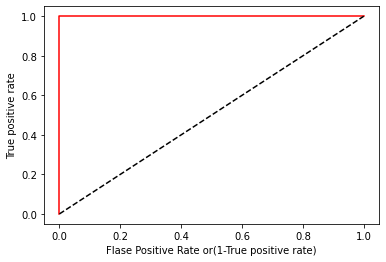

In [20]:
fpr,tpr,threshholds = roc_curve(y_train,dt_model.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'dt_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')


### Testing Data

In [21]:
y_pred_test = dt_model.predict(X_test)

In [22]:
print(accuracy_score(y_test,y_pred_test))

0.675


In [23]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.78      0.70        40
           1       0.72      0.57      0.64        40

    accuracy                           0.68        80
   macro avg       0.68      0.68      0.67        80
weighted avg       0.68      0.68      0.67        80



In [24]:
confusion_matrix(y_test,y_pred_test)

array([[31,  9],
       [17, 23]], dtype=int64)

# The model has overfitted.

### Let us use gridsearchcv to get best parameters.

In [25]:
grid_search = GridSearchCV(estimator=dt_model,
                          param_grid={'criterion':['gini','entropy'],
                                     'max_depth':[2,3,4,5,6,7,8,9,10]},
                          cv = 5)
grid_search.fit(X,y) # fit whole data

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [26]:
print(grid_search.best_params_)
print(grid_search.best_score_) #best score possible

{'criterion': 'entropy', 'max_depth': 8}
0.735


In [44]:
dt_model_1 = DecisionTreeClassifier(criterion='entropy',max_depth=8)
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
plt.figure(figsize=(14,6))
plot_tree(dt_model_1,filled=True) 
plt.show()

### Training Data

In [45]:
y_pred_train = dt_model_1.predict(X_train)

In [46]:
print(accuracy_score(y_train,y_pred_train))

0.95625


In [47]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       161
           1       0.99      0.92      0.95       159

    accuracy                           0.96       320
   macro avg       0.96      0.96      0.96       320
weighted avg       0.96      0.96      0.96       320



In [48]:
confusion_matrix(y_train,y_pred_train)

array([[160,   1],
       [ 13, 146]], dtype=int64)

0.9560139067932342


Text(0, 0.5, 'True positive rate')

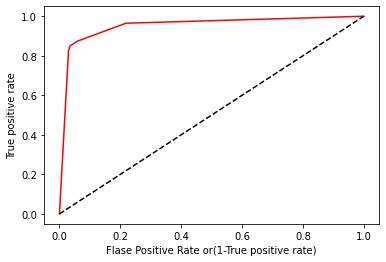

In [49]:
fpr,tpr,threshholds = roc_curve(y,dt_model_1.predict_proba(X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'dt_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [50]:
y_pred_test = dt_model_1.predict(X_test)

In [51]:
print(accuracy_score(y_test,y_pred_test))

0.7125


In [52]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        40
           1       0.79      0.57      0.67        40

    accuracy                           0.71        80
   macro avg       0.73      0.71      0.71        80
weighted avg       0.73      0.71      0.71        80



In [53]:
confusion_matrix(y_test,y_pred_test)

array([[34,  6],
       [17, 23]], dtype=int64)

0.7124999999999999


Text(0, 0.5, 'True positive rate')

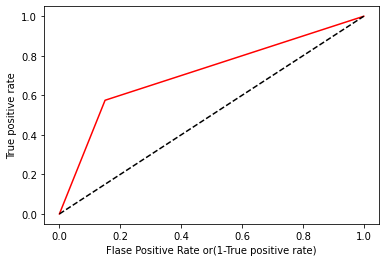

In [54]:
fpr,tpr,threshholds = roc_curve(y_test,y_pred_test)

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'dt_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

## The problem of overfitting is solved a bit.

# To find the most important feature for target variable.

In [62]:
dt_model_1.feature_names_in_

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], dtype=object)

In [63]:
dt_model_1.feature_importances_

array([0.14898632, 0.1066506 , 0.10529519, 0.04120725, 0.32932532,
       0.1647371 , 0.06669472, 0.03710351, 0.        , 0.        ])

In [64]:
list(dt_model_1.feature_names_in_)

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [70]:
sorted_features = pd.DataFrame([list(dt_model_1.feature_names_in_),list(dt_model_1.feature_importances_)]).T #'FeatureImportance
sorted_features

,0,1
0,CompPrice,0.148986
1,Income,0.106651
2,Advertising,0.105295
3,Population,0.041207
4,Price,0.329325
5,ShelveLoc,0.164737
6,Age,0.066695
7,Education,0.037104
8,Urban,0.0
9,US,0.0


In [72]:
sorted_features.rename(mapper=[0,1],
    columns=['a','b'],
    inplace=True,)

TypeError: Cannot specify both 'mapper' and any of 'index' or 'columns'

In [ ]:
sorted_features.rename_axis()

In [78]:
fi = pd.DataFrame({'feature': list(dt_model_1.feature_names_in_),'importance': dt_model_1.feature_importances_}).sort_values('importance', ascending = False)

In [79]:
fi

,feature,importance
4,Price,0.329325
5,ShelveLoc,0.164737
0,CompPrice,0.148986
1,Income,0.106651
2,Advertising,0.105295
6,Age,0.066695
3,Population,0.041207
7,Education,0.037104
8,Urban,0.000000
9,US,0.000000


In [80]:
fi = pd.DataFrame({'feature': list(dt_model_1.feature_names_in_),'importance': list(dt_model_1.feature_importances_)}).sort_values('importance', ascending = False)

In [81]:
fi

,feature,importance
4,Price,0.329325
5,ShelveLoc,0.164737
0,CompPrice,0.148986
1,Income,0.106651
2,Advertising,0.105295
6,Age,0.066695
3,Population,0.041207
7,Education,0.037104
8,Urban,0.000000
9,US,0.000000


# Price is the most important feature.